# Exploring Harmonic Balance with Josephson Circuits

https://github.com/kpobrien/JosephsonCircuits.jl

## Josephson parametric amplifier (JPA)

From example on Github page

  2.964877 seconds (4.59 M allocations: 244.311 MiB, 3.33% gc time, 98.98% compilation time: 41% of which was recompilation)


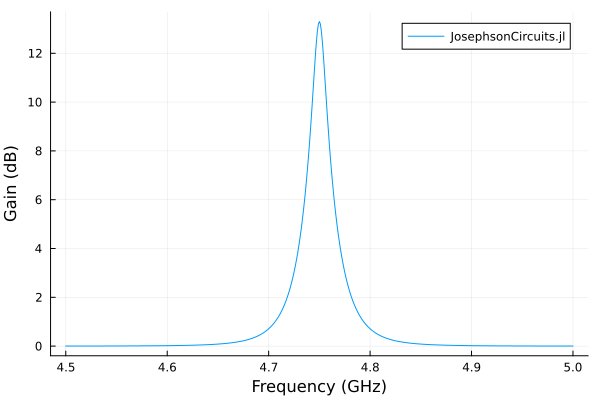

In [3]:
using JosephsonCircuits
using Plots

@variables R Cc Lj Cj
circuit = [
    ("P1","1","0",1),
    ("R1","1","0",R),
    ("C1","1","2",Cc),
    ("Lj1","2","0",Lj),
    ("C2","2","0",Cj)]

circuitdefs = Dict(
    Lj =>1000.0e-12,
    Cc => 100.0e-15,
    Cj => 1000.0e-15,
    R => 50.0)

ws = 2*pi*(4.5:0.001:5.0)*1e9
wp = (2*pi*4.75001*1e9,)
Ip = 0.00565e-6
sources = [(mode=(1,),port=1,current=Ip)]
Npumpharmonics = (16,)
Nmodulationharmonics = (8,)

@time jpa = hbsolve(ws, wp, sources, Nmodulationharmonics,
    Npumpharmonics, circuit, circuitdefs)

plot(
    jpa.linearized.w/(2*pi*1e9),
    10*log10.(abs2.(
        jpa.linearized.S(
            outputmode=(0,),
            outputport=1,
            inputmode=(0,),
            inputport=1,
            freqindex=:
        ),
    )),
    label="JosephsonCircuits.jl",
    xlabel="Frequency (GHz)",
    ylabel="Gain (dB)",
)

## Driven Kerr Oscillator

OK, code runs, things are installed. I do have difficulty visualising the thing I am simulating, a good reason for a GUI!!! :)

A next test I would like to try is to see if I can reproduce a Kerr shift with a blue detuned pump, then try again with a red detuned pump, see the "shark attack", pump bifurcation, and hopefully my "idler modes"

### Blue sideband Kerr shift

Not sure how to code it....need to understand the library better. 
